In [1]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('datasets/Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data = data.rename(index=str, columns={'Chance of Admit ': 'Admit_Probability'})
data = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Admit_Probability']]

In [7]:
plt.figure(figsize=(8,8))
fig = sns.regplot(x='GRE Score', y='TOEFL Score ', data=data)
plt.title('GRE Score vs TOEFL Score')
plt.show()

KeyError: 'TOEFL Score '

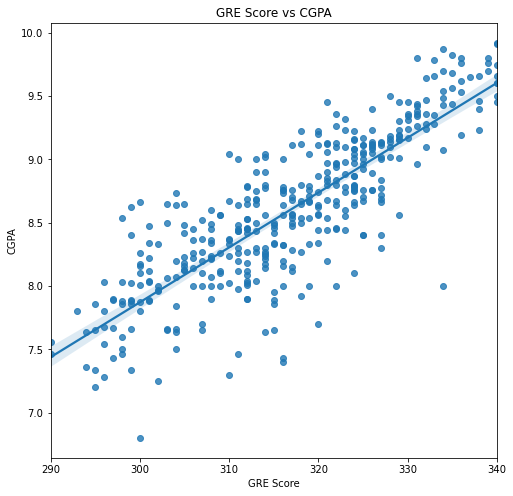

In [8]:
plt.figure(figsize=(8,8))
fig = sns.regplot(x='GRE Score', y='CGPA', data=data)
plt.title('GRE Score vs CGPA')
plt.show()

Text(0, 0.5, 'CGPA')

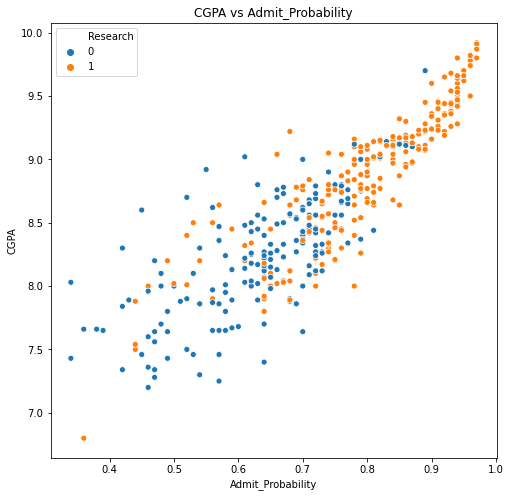

In [9]:
plt.figure(figsize=(8,8))
fig = sns.scatterplot(x='Admit_Probability', y='CGPA', data=data, hue='Research')
plt.title('CGPA vs Admit_Probability')
plt.xlabel('Admit_Probability')
plt.ylabel('CGPA')

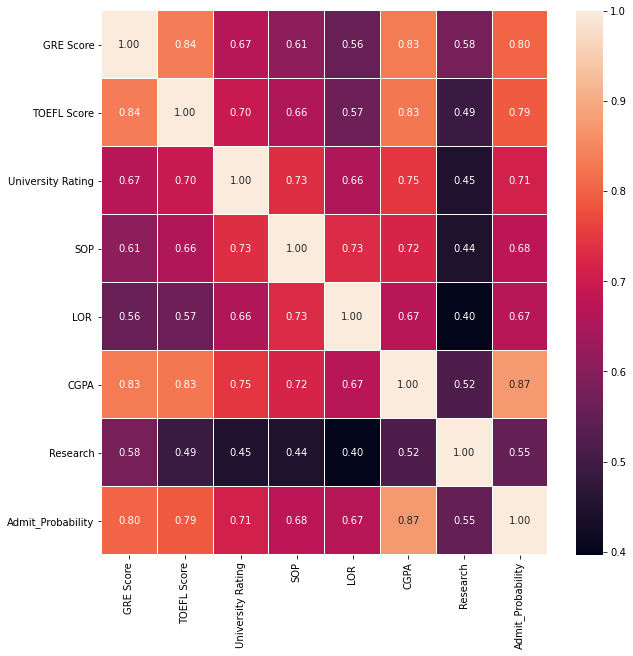

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt='.2f')
plt.show()

In [11]:
#This standardizes the data by subtracting the mean and dividing by the standard deviation
#This scales all features to have zero mean and unit svariance
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']] = preprocessing.scale(data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])

In [12]:
data.sample(10) #Note that all features specified has been standardized

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
113,0.278595,0.427257,2,0.596653,0.052933,-0.065357,0,0.72
348,-1.292182,-1.387349,1,-1.392191,-1.618648,-2.264926,0,0.57
123,-0.768590,0.097329,3,0.099442,0.052933,-0.636238,0,0.61
347,-1.553979,-2.212170,1,-2.386613,-2.733036,-2.113811,0,0.42
218,0.627656,0.427257,4,-0.397769,0.052933,0.623057,1,0.84
262,-0.768590,-0.727492,2,-0.894980,0.610127,-0.401169,1,0.70
53,0.627656,0.757186,4,0.596653,-1.061454,-0.837725,1,0.72
352,-1.204917,-1.222385,2,-0.397769,0.052933,-0.904888,1,0.64
101,-0.419528,-0.397564,2,-0.894980,-0.504260,-0.804144,0,0.64
337,1.325780,1.746971,5,1.591075,1.724515,1.462587,1,0.94


In [13]:
col = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']
features = data[col]
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


In [14]:
target = data[['Admit_Probability']]
target.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [15]:
y = target.copy()

In [16]:
#This creates the classification buckets
y.replace(to_replace=target[target >= 0.80], value=int(2), inplace=True)
y.replace(to_replace=target[target >= 0.60], value=int(1), inplace=True)
y.replace(to_replace=target[target < 0.80], value=int(0), inplace=True)

In [17]:
target = y
target['Admit_Probability'].unique()

array([2., 1., 0.])

In [18]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2)

In [19]:
Xtrain = torch.from_numpy(X_train.values).float()
xtest = torch.from_numpy(x_test.values).float()

In [20]:
Xtrain.shape

torch.Size([320, 5])

In [21]:
Y_train.shape, y_test.shape #These are two dimensional arrays

((320, 1), (80, 1))

In [22]:
#Converts the two dimensional arrays into 1D
Ytrain = torch.from_numpy(Y_train.values).view(1, -1)[0].long()
Ytest = torch.from_numpy(y_test.values).view(1, -1)[0].long()

In [23]:
type(Ytrain), type(Ytest)

(torch.Tensor, torch.Tensor)

In [24]:
Ytrain.shape, Ytest.shape #Both are 1D arrays

(torch.Size([320]), torch.Size([80]))

In [25]:
input_size = Xtrain.shape[1]
output_size = len(target['Admit_Probability'].unique())

In [26]:
 #
 # Stopped at video 40 time 1:28
 #